### `GridSearchCV`: 교차 검증과 최적 하이퍼 파라미터 찾기

* 훈련 단계에서 학습한 파라미터에 영향을 받아서 최상의 파라미터를 찾는 일은 항상 어려운 문제
* 다양한 모델의 훈련 과정을 자동화하고, 교차 검사를 사용해 최적 값을 제공하는 도구 필요
*즉 **교차 검증을 여러번 해서 최적의 하이퍼 파라미터**를 찾는 것



In [8]:
#불러오기
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

alpha = [0.001,0.01,0.1,1,10,100,1000]
#param_grid : 파라미터 딕셔너리. (파라미터명과 사용될 여러 파라미터 값을 지정)
param_grid = dict(alpha=alpha)
#{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}이런 형태의 dict으로 전환


#구현 순서: GridSearCV("모델", param_grid = "dictionary 형태의 파라미터", cv = "교차검증 수")
gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes.data, diabetes.target)

print("최적의 점수:",result.best_score_)
print("최적의 파라미터:",result.best_params_)
print(gs.best_estimator_)
#grid search의 결과는 cv_results_에 담겨 있어 DataFrame형태로 변환
pd.DataFrame(result.cv_results_)
#params의 수가 7가지 이므로 7번 돌린것

최적의 점수: 0.4633240541517593
최적의 파라미터: {'alpha': 0.1}
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000739,0.000093,0.000369,0.000019,0.001,{'alpha': 0.001},0.554415,0.233686,0.356799,0.620259,0.267033,0.619397,0.419907,0.433019,0.433431,0.684984,0.462293,0.145848,3
1,0.000669,0.000022,0.000361,0.000022,0.01,{'alpha': 0.01},0.546297,0.244132,0.368901,0.613732,0.271717,0.623089,0.426074,0.424759,0.429484,0.680912,0.462910,0.141446,2
2,0.000684,0.000041,0.000357,0.000018,0.1,{'alpha': 0.1},0.526550,0.244987,0.383530,0.606594,0.286094,0.618033,0.431230,0.441788,0.431968,0.662466,0.463324,0.132681,1
3,0.000781,0.000128,0.000395,0.000072,1,{'alpha': 1},0.421593,0.168442,0.358004,0.512608,0.284928,0.514264,0.388246,0.484448,0.396502,0.525132,0.405417,0.108385,4
4,0.000703,0.000036,0.000370,0.000024,10,{'alpha': 10},0.159386,-0.081177,0.152190,0.165690,0.119349,0.186933,0.158147,0.203748,0.153627,0.189440,0.140733,0.077298,5
5,0.000763,0.000150,0.000378,0.000054,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000833,0.000186,0.000447,0.000175,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


* `multiprocessing`을 이용한 `GridSearchCV`

In [14]:
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [
              {
                  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                  'C' : [0.5,1.0,1.5,2.0,3.5]
              }
]

#scoring에 accuracy말고도 roc_auc,average_precision등 여러 가지 지표가 올 수 있다. 여기서는 정확도를 구하기 위해서
#accuracy를 사용
gs = GridSearchCV(estimator = LogisticRegression(),param_grid=param_grid, scoring='accuracy',cv = 10, n_jobs= multiprocessing.cpu_count())

result = gs.fit(iris.data, iris.target)

print("최적의 점수:",result.best_score_)
print("최적의 파라미터:",result.best_params_)

#grid search의 결과는 cv_results_에 담겨 있어 DataFrame형태로 변환
pd.DataFrame(result.cv_results_)
#params의 수가 7가지 이므로 7번 돌린것
#c값에 대한 패널티 값을 다 출력

최적의 점수: 0.9800000000000001
최적의 파라미터: {'C': 0.5, 'penalty': 'none'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000277,0.000128,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.049066,0.004390,0.000667,0.000039,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.966667,0.033333,10
2,0.000392,0.000371,0.000000,0.000000,0.5,elasticnet,"{'C': 0.5, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
3,0.028752,0.003465,0.000657,0.000117,0.5,none,"{'C': 0.5, 'penalty': 'none'}",1.0,1.000000,1.0,1.000000,0.933333,1.000000,0.866667,1.0,1.0,1.0,0.980000,0.042687,1
4,0.000259,0.000042,0.000000,0.000000,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
5,0.058798,0.010215,0.000604,0.000058,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,7
6,0.000275,0.000031,0.000000,0.000000,1.0,elasticnet,"{'C': 1.0, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
7,0.025411,0.002505,0.000582,0.000082,1.0,none,"{'C': 1.0, 'penalty': 'none'}",1.0,1.000000,1.0,1.000000,0.933333,1.000000,0.866667,1.0,1.0,1.0,0.980000,0.042687,1
8,0.000276,0.000036,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,0.052365,0.002486,0.001179,0.001796,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,7


## `preprocessing` 데이터 전처리 모듈

* 데이터의 특징 스케일링(feature scaling)을 위한 방법으로 표준화(Standardization)와 정규화(Normalization) 사용


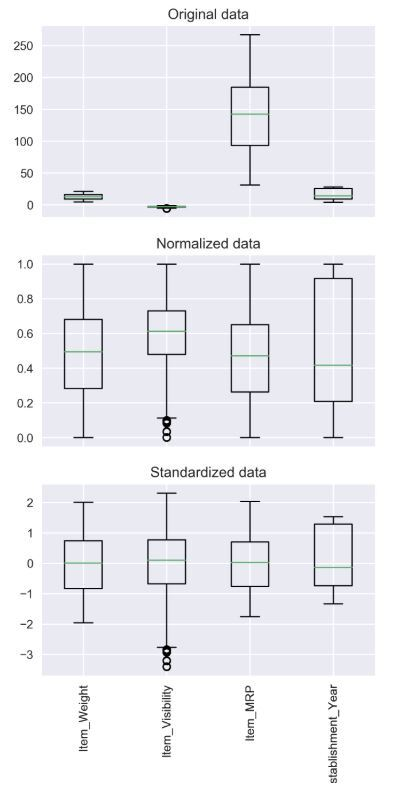

+ 표준화 방법

\begin{equation}
x_i^{'} = \frac{x_i-mean(x)}{stdev(x)}
\end{equation}

+ 표준화는 어떤 특성의 값들이 정규분포, 즉 종모양의 분포를 따른다고 가정하고 값들을 0의 평균, 1의 표준편차를 갖도록 변환해주는 것입니다. 표준화를 해주면 정규화처럼 특성값의 범위가 0과 1의 범위로 균일하게 바뀌지는 않습니다

+ 즉 값들을 0의 평균, 1의 표준편차를 갖도록 변환해준다.



+ 정규화 방법

\begin{equation}
x_i^{'} = \frac{x_i-min(x)}{max(x)-min(x)}
\end{equation}

+ 정규화 : 데이터의 최솟값 = 0 / 최댓값 = 1으로 설정후 그 사이에 값들의 비율을 유지하면서 변환





+ scikit-learn에서는 개별 벡터 크기를 맞추는 형태로 정규화

+ 머신러닝 모델은 단위없이 값을 가지고 판단하기 때문에, 단위별 스케일이 안맞을 수도 있다.

+ 따라서 단위를 맞추어 주는 스케일링을 해야 한다.

### `StandardScaler`: 표준화 클래스

In [16]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names) #데이터 프레임으로 만들어보자
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_df_scaled, iris.target, test_size = 0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9809523809523809


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


### `MinMaxScaler`: 정규화 클래스

In [21]:
from pandas.core.frame import DataFrame
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled =  pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [22]:
X_train,X_test,y_train,y_test = train_test_split(iris_df_scaled, iris.target, test_size = 0.3)

model = LogisticRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))

#결론적으로 평가데이터의 확률이 높아야 한다.

0.9333333333333333


## 성능 평가 지표



*   모델의 성능 평가란, 실제값과 모델에 의해 예측된 값을 비교하여 두 값의 차이를 구하는 것
*   하지만 현실적으로 두 값의 차이가 0이 되는 것은 불가능 하기 때문에 오차를 얼마나 허용할지 결정해야 한다.
*  모델 평가를 하는 목적은 과적합을 방지하고 최적화의 모델을 찾기 위해서다.
* 모델의 목적 또는 목표 변수 유형에 따라 다른 평가 지표를 사용한다.


### 정확도(Accuracy)

* 정확도는 전체 예측 데이터 건수 중 예측 결과가 동일한 데이터 건수로 계산
* scikit-learn에서는 `accuracy_score` 함수를 제공
* 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
*예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [25]:
from sklearn.metrics import accuracy_score
#모델을 만등어 주는 라이브러리
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#make_classifciation을 사용
X,y = make_classification(n_samples = 1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

#accuracy 구하기
predict = model.predict(X_test)
#y_test, predict 순서
print("정확도:",accuracy_score(y_test, predict))
#하지만 정확도 만으로 모델링이 잘 되었는지 판단 할 수 없다.

0.9785714285714285
0.9766666666666667
정확도: 0.9766666666666667


### 오차 행렬(Confusion Matrix)
* 오차 행렬을 통해 우리는 정확도, 정밀도, 민감도, 특이도 등을 구할 수 있다.
*정확도는 방금 말했다시피 전체 중 맞게 예측할 확률을 의미한다
*정밀도는 맞다고 예측했는데 실제 맞을 확률을 의미한다.
*민감도는 실제 맞았는데 맞다고 예측했을 확률을 의미한다.
*특이도는 실제 틀렸는데 틀렸다고 예측했을 확률을 의미한다.
--------------

*정확도 = Acc = (tp + tn) / ALL 징밀도 = Prec = (tp)/(tp + fp) 민감도 = sens = tp / (tp+fn) 특이도 = spec = tn /tn + fp

*True Negative: 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0

*False Positive: 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0

*False Negative: 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1

*True Positive: 예측값을 Positive 값 1로 예측했고, 실제 값도 Positive 값 1

-------------

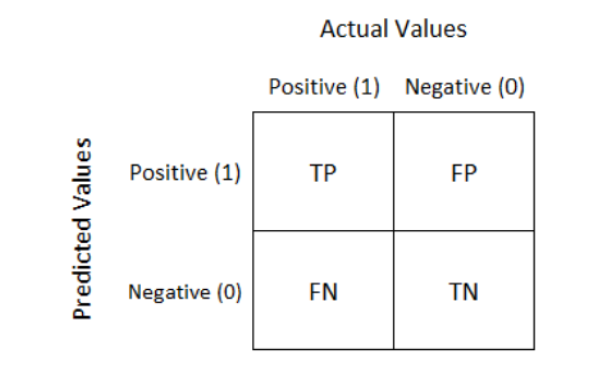

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#predict = model.predict(X_test)위의 이코드 말하는 거
confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[156   7]
 [  0 137]]


<function matplotlib.pyplot.show>

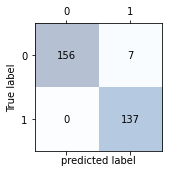

In [32]:
#시각화 해서 알아보자
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat,cmap = plt.cm.Blues,alpha = 0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i,j],va = 'center',ha = 'center')

plt.xlabel("predicted label")
plt.ylabel('True label')
plt.tight_layout()
plt.show

### 정밀도(Precision)와 재현율(Recall)

* 정밀도 = TP / (FP + TP)
* 재현율 = TP / (FN + TP)

* 정확도 = (TN + TP) / (TN + FP + FN + TP)
* 오류율 = (FN + FP) / (TN + FP + FN + TP)

In [34]:
from sklearn.metrics import precision_score, recall_score

#순서는 y_test, predict순서로 한다.
precision = precision_score(y_test,predict)
recall = recall_score(y_test,predict)

print(precision)
print(recall)

0.9513888888888888
1.0


### F1 Score(F-measure)

* 정밀도와 재현율을 결합한 지표
* 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐

\begin{equation}
F1 = 2 \times \frac{precision \times recall}{precision + recall}
\end{equation}

In [35]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,predict)
print(f1)

0.9750889679715302
